# Dueling DQN Agent 

## Introduction 
In this notebook, we are going to train an agent implementing a Dueling Deep Q Network for solving an Unity environment. Please read the ReadME file for information concerning the installation and Report.pdf for information concerning the model. 

## Getting started
First import the mandatory packages

In [1]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Prepare the environment. The file_name should be modified according to the location of environment you have downloaded following the instructions present in the ReadMe file.

In [2]:
# Load the environment (should open a window)
env = UnityEnvironment(file_name="/home/romain/Documents/Udacity/DRL/p1-navigation/unity/Banana.x86_64")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Import the dqn agent

In [3]:
from Agent import Agent
agent = Agent(state_size=37, action_size=4, seed=0,double_agent=True,dueling_agent=True)

output_file_name="double_dueling_agent.pth" # file name under which the weights will be saved

## Train the Agent

In [4]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.05, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), output_file_name)
            break
    return scores

scores = dqn(n_episodes=900,eps_decay=0.985,eps_end=0.01)



Episode 100	Average Score: 2.77
Episode 200	Average Score: 9.22
Episode 268	Average Score: 13.00
Environment solved in 168 episodes!	Average Score: 13.00


## Observe the result

Score during the training

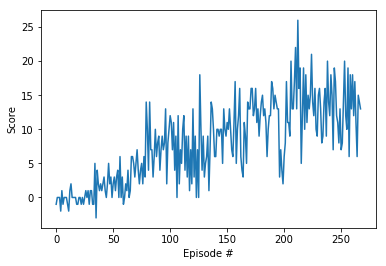

In [5]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Watch the Agent.

In [6]:
agent.qnetwork_local.load_state_dict(torch.load('dueling_dqn_agent.pth'))
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state, 0)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))


RuntimeError: Error(s) in loading state_dict for QNetwork:
	size mismatch for fc1.weight: copying a param of torch.Size([128, 37]) from checkpoint, where the shape is torch.Size([512, 37]) in current model.
	size mismatch for fc1.bias: copying a param of torch.Size([128]) from checkpoint, where the shape is torch.Size([512]) in current model.
	size mismatch for fc2.weight: copying a param of torch.Size([64, 128]) from checkpoint, where the shape is torch.Size([256, 512]) in current model.
	size mismatch for fc2.bias: copying a param of torch.Size([64]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for advantage.weight: copying a param of torch.Size([4, 64]) from checkpoint, where the shape is torch.Size([4, 256]) in current model.
	size mismatch for state_value.weight: copying a param of torch.Size([1, 64]) from checkpoint, where the shape is torch.Size([1, 256]) in current model.

## Close the environment

In [ ]:
env.close()